In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Statistics for "Survived" column:
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64




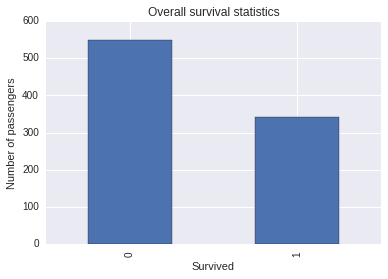

Note: here, Survived=1 means survival, Survived=0 means death


In [4]:
# Plot and describe overall survival statistics
print 'Statistics for "Survived" column:'
print train['Survived'].describe()
print '\n'

plt.title('Overall survival statistics')
plt.xlabel('Survived')
plt.ylabel('Number of passengers')
train.Survived.value_counts().plot(kind='bar')
plt.show()
print 'Note: here, Survived=1 means survival, Survived=0 means death'

In [5]:
# Investigate if there are missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Question:
What factors made people more likely to survive?

# Data wrangling phase

In [6]:
# Drop useless columns
train.pop('Name')
train.pop('Ticket')
train.pop('Cabin')

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Let's draw some histograms to determine appropriate buckets for numerical data

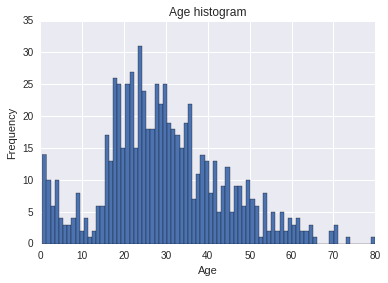

In [7]:
plt.title('Age histogram')
plt.xlabel('Age')
train['Age'].dropna().plot(kind='hist', bins = int(max(train['Age'])))
plt.show()

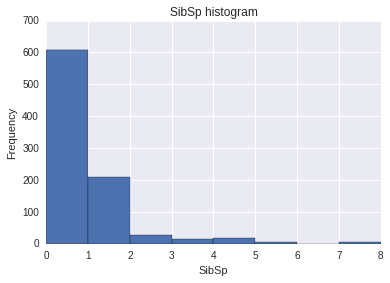

In [8]:
plt.title('SibSp histogram')
plt.xlabel('SibSp')
train['SibSp'].dropna().plot(kind='hist', bins=int(max(train['SibSp'])))
plt.show()

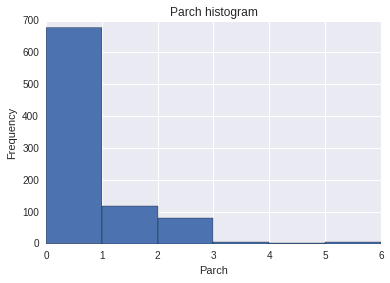

In [9]:
plt.title('Parch histogram')
plt.xlabel('Parch')
train['Parch'].dropna().plot(kind='hist', bins=int(max(train['Parch'])))
plt.show()

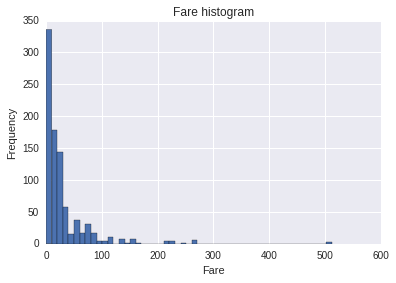

In [10]:
plt.title('Fare histogram')
plt.xlabel('Fare')
train['Fare'].dropna().plot(kind='hist', bins=int(max(train['Fare']/10)))
plt.show()

Let's map data with a lot of different values to buckets. Specifically, I want to analyze:  
1) Survival by age groups. Here, mapping from continuous values to age buckets will help. Also, this is the only useful column containing null values. So we will need to handle that too. I will map ages to 8 buckets: '0-10', '10-20', ... '70+' and 'N/A' for missing values    
2) Survival percentage by fare. I will map fares to 2 buckets: cheap tickets (fare <= 50) and expensive ones (fare > 50)  
3) Survival percentage by "SibSp" parameter. Specifically, I want to look if passenger having a sibling / spouse on board had better chances of survival. So, I will map values to 2 buckets: had SibSp (SibSp >=1) or did not (SibSp = 0)  
4) Survival percengtege by "Parch" parameter. Specifically, I want to look if passenger having a parent / chilredn on had better chances of survival. So, I will map values to 2 buckets: had Parch (Parch > =1) or did not (Parch = 0)

In [11]:
# Map ages to age buckets
def map_ages(age):
    if (age >= 0) and (age <= 10):
        return '0-10'
    if (age > 10) and (age <= 20):
        return '10-20'
    if (age > 20) and (age <= 30):
        return '20-30'
    if (age > 30) and (age <= 40):
        return '30-40'
    if (age > 40) and (age <= 50):
        return '40-50'
    if (age > 50) and (age <= 60):
        return '50-60'
    if (age > 60) and (age <= 70):
        return '60-70'
    if (age > 70):
        return '70+'
    else:
        return 'N/A'

In [12]:
# Map SibSp parameter to 2 buckets
def had_sibsp(sibsp):
    if (sibsp == 0):
        return 'no'
    else:
        return 'yes'

In [13]:
# Map Parch paramter to 2 buckets
def had_parch(parch):
    if (parch == 0):
        return 'no'
    else:
        return 'yes'

In [14]:
# Map ticket fares into 2 buckets
def map_fare(fare):
    if (fare <= 50):
        return 'cheap'
    else:
        return 'expensive'

In [15]:
# Transform columns
train['Age'] = train['Age'].apply(map_ages)
train['Parch'] = train['Parch'].apply(had_parch)
train['SibSp'] = train['SibSp'].apply(had_sibsp)
train['Fare'] = train['Fare'].apply(map_fare)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,20-30,yes,no,cheap,S
1,2,1,1,female,30-40,yes,no,expensive,C
2,3,1,3,female,20-30,no,no,cheap,S
3,4,1,1,female,30-40,yes,no,expensive,S
4,5,0,3,male,30-40,no,no,cheap,S


# Exploration phase

In [16]:
# Explore data for columns
def explore(columns):
    # Print some statisticcs
    print 'Statistics:'
    print train[columns].describe(include='all')
    print '\n'
    
    # Group by column
    groupby = train.groupby(by=columns)
    
    # Print data distribution
    print 'Distribution:'
    print groupby.count()['Survived']
    print '\n'
    
    # Plot survival percentages
    if len(columns) > 1:
        plt.title('Survival by ' + ', '.join(columns))
    else:
        plt.title('Survival by ' + columns[0])
        
    plt.ylabel('Survival percentage')
    groupby.mean()['Survived'].plot(kind='bar')
    plt.show()

Hypothesis: females were more likely to survive than males. This could happen, for example, due to preferential treatment for lifeboats

Statistics:
         Sex
count    891
unique     2
top     male
freq     577


Distribution:
Sex
female    314
male      577
Name: Survived, dtype: int64




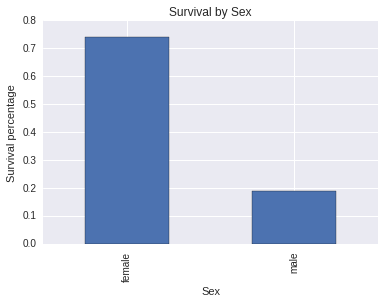

In [17]:
explore (['Sex'])

Indeed, we see a drastic difference in male and female survival rates.  

However this could have happened due to other reasons:  
1) Actually, first class passengers were more likely to survive. It just so happened that there were far more women in first class than in other classes  
2) Or, maybe certain age groups (children?) were more likely to survive? And it just so happened there were a lot more underaged women than men  

Let's explore these hypotheses

Let's see if first class passengers were more likely to survive

Statistics:
           Pclass
count  891.000000
mean     2.308642
std      0.836071
min      1.000000
25%      2.000000
50%      3.000000
75%      3.000000
max      3.000000


Distribution:
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64




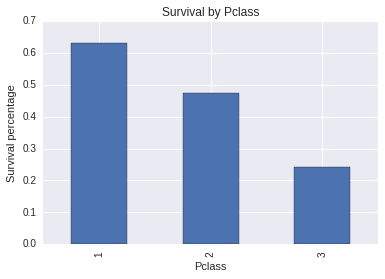

In [18]:
explore(['Pclass'])

Indeed, we see a difference in survival rates between 1, 2 and 3 classes. But maybe there were more women in first class. Let's slice the data by Pclass and Sex

Statistics:
         Sex      Pclass
count    891  891.000000
unique     2         NaN
top     male         NaN
freq     577         NaN
mean     NaN    2.308642
std      NaN    0.836071
min      NaN    1.000000
25%      NaN    2.000000
50%      NaN    3.000000
75%      NaN    3.000000
max      NaN    3.000000


Distribution:
Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64




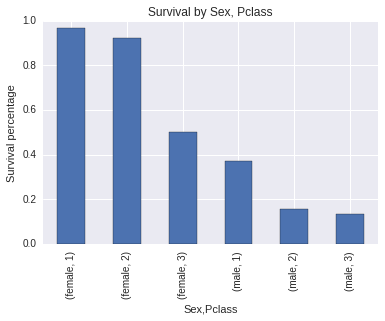

In [19]:
explore (['Sex', 'Pclass'])

Judging by this graph both Sex and Pclass were predictors of survival

Let's see if 'Age' influenced chances of survival

Statistics:
          Age
count     891
unique      9
top     20-30
freq      230


Distribution:
Age
0-10      64
10-20    115
20-30    230
30-40    155
40-50     86
50-60     42
60-70     17
70+        5
N/A      177
Name: Survived, dtype: int64




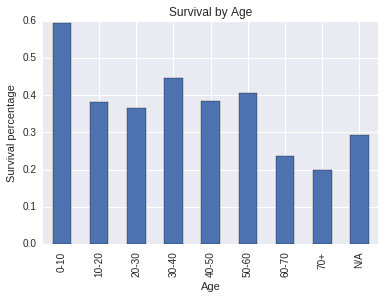

In [20]:
explore (['Age'])

Looking at this graph we can see that children (ages 10-20) were definitely more lilely to survive. Maybe this was actually due to differences in Sex or Pclass?

Statistics:
         Sex    Age
count    891    891
unique     2      9
top     male  20-30
freq     577    230


Distribution:
Sex     Age  
female  0-10      31
        10-20     46
        20-30     81
        30-40     55
        40-50     31
        50-60     14
        60-70      3
        N/A       53
male    0-10      33
        10-20     69
        20-30    149
        30-40    100
        40-50     55
        50-60     28
        60-70     14
        70+        5
        N/A      124
Name: Survived, dtype: int64




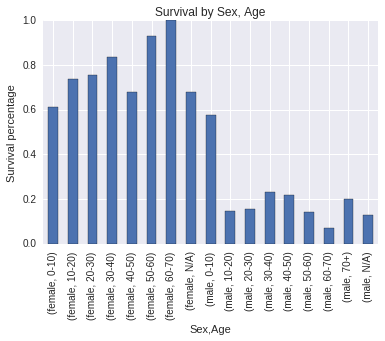

In [21]:
explore (['Sex', 'Age'])

Judging by this graph male children were indeed more likely to survive than grown men. However, I am a little surprised that female children were actually LESS likely to survive than females aged 10+. Maybe not all children were able to make it to lifeboats?

Let's explore Age and Pclass

Statistics:
            Pclass    Age
count   891.000000    891
unique         NaN      9
top            NaN  20-30
freq           NaN    230
mean      2.308642    NaN
std       0.836071    NaN
min       1.000000    NaN
25%       2.000000    NaN
50%       3.000000    NaN
75%       3.000000    NaN
max       3.000000    NaN


Distribution:
Pclass  Age  
1       0-10       3
        10-20     18
        20-30     40
        30-40     49
        40-50     37
        50-60     25
        60-70     11
        70+        3
        N/A       30
2       0-10      17
        10-20     18
        20-30     61
        30-40     43
        40-50     19
        50-60     12
        60-70      3
        N/A       11
3       0-10      44
        10-20     79
        20-30    129
        30-40     63
        40-50     30
        50-60      5
        60-70      3
        70+        2
        N/A      136
Name: Survived, dtype: int64




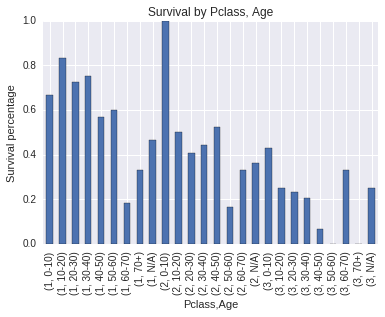

In [22]:
explore(['Pclass', 'Age'])

Looks like overall wealthier passengers were more likely to survive. It's interesting that children from 3rd class were actually less likely to survive than almost any age from 1st class.

# Conclusions phase

I explored how Age, Sex and Pclass influenced chances of survival.  

Looks like the strongest predictor (out of 3 explored) of survival was gender (probably because women were given places on lifeboats before men).  
Passenger class played its role too. 1st and 2nd class passengers were more likely to survive than 3rd class passengers (due to preferential treatment maybe? or maybe their cabins were closer to lifeboats?)  
Finally, seems that children were more likely to survive (maybe their parents gave their places on lifeboats to their children?)  

There are some limitations to my analysis and some things that could be done next:  
1) There are no rigorous statistical tests  
2) Not all the variables are explored  
3) Causation is not clear. For example, did 1st class passengers really get preferential treatment? Or they were simply situated closer to lifeboats?  
4) It would be interesting to build a classifier and see how it would do on test data  